In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('basics.csv')
df.head()

,Unnamed: 0,id,gender,batch,avg_internet_usage,usage_type,avg_pre_covid_use,avg_post_covid_use,change_in_usage
0,0,17/20,F,senior,6 to 8 hours per day,Online learning,4 to 6 hrs per day,6 to 8 hrs per day,INCREASED
1,1,17/1,F,senior,4 to 6 hours per day,Online learning,8 or more hrs per day,8 or more hrs per day,NO CHANGE
2,2,17/10,F,senior,more than 8 hours per day,Online learning,6 to 8 hrs per day,4 to 6 hrs per day,DECREASED
3,3,17/11,F,senior,6 to 8 hours per day,Online learning,2 to 4 hrs per day,8 or more hrs per day,INCREASED
4,4,17/12,F,senior,6 to 8 hours per day,Online learning,4 to 6 hrs per day,6 to 8 hrs per day,INCREASED


In [3]:
df = df.drop(columns='Unnamed: 0')
df.head()

,id,gender,batch,avg_internet_usage,usage_type,avg_pre_covid_use,avg_post_covid_use,change_in_usage
0,17/20,F,senior,6 to 8 hours per day,Online learning,4 to 6 hrs per day,6 to 8 hrs per day,INCREASED
1,17/1,F,senior,4 to 6 hours per day,Online learning,8 or more hrs per day,8 or more hrs per day,NO CHANGE
2,17/10,F,senior,more than 8 hours per day,Online learning,6 to 8 hrs per day,4 to 6 hrs per day,DECREASED
3,17/11,F,senior,6 to 8 hours per day,Online learning,2 to 4 hrs per day,8 or more hrs per day,INCREASED
4,17/12,F,senior,6 to 8 hours per day,Online learning,4 to 6 hrs per day,6 to 8 hrs per day,INCREASED


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  194 non-null    object
 1   gender              194 non-null    object
 2   batch               194 non-null    object
 3   avg_internet_usage  194 non-null    object
 4   usage_type          194 non-null    object
 5   avg_pre_covid_use   194 non-null    object
 6   avg_post_covid_use  194 non-null    object
 7   change_in_usage     194 non-null    object
dtypes: object(8)
memory usage: 12.2+ KB


In [5]:
gender_counts = df['gender'].value_counts()
gender_counts

gender
M    117
F     77
Name: count, dtype: int64

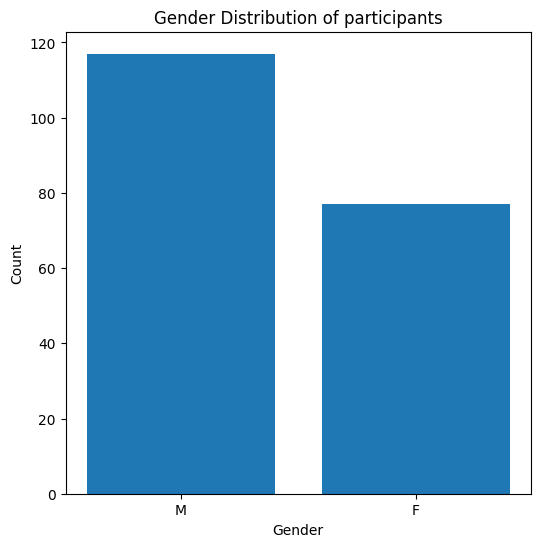

In [6]:
fig, ax = plt.subplots(figsize=(6,6))

ax.bar(gender_counts.index, gender_counts)
ax.set_title("Gender Distribution of participants")
ax.set_xlabel("Gender")
ax.set_ylabel("Count")

plt.show()

In [7]:
gender_batch_counts = df.groupby(['batch', 'gender']).size().unstack()
gender_batch_counts

gender,F,M
batch,,
junior,45,94
senior,32,23


<Axes: xlabel='batch'>

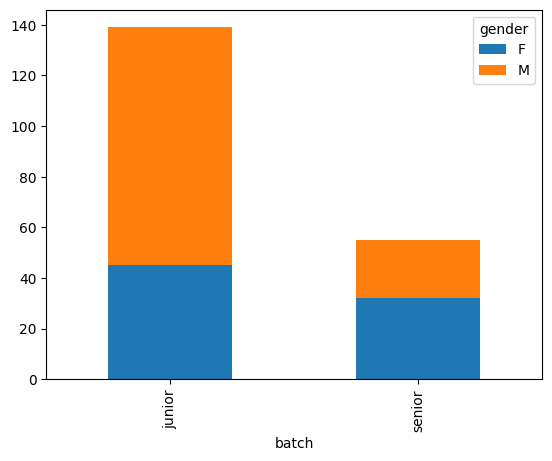

In [8]:
gender_batch_counts.plot(kind='bar', stacked=True)

So we know that the groups are unbalanced. We will keep this in mind during our analysis.

In [9]:
gender_batch_counts['F%'] = gender_batch_counts.apply(lambda row:(row['F'] / (row['F'] + row['M']))*100, axis=1)

In [10]:
gender_batch_counts['M%'] = gender_batch_counts.apply(lambda row:(row['M'] / (row['F'] + row['M']))*100, axis=1)

In [11]:
gender_batch_counts

gender,F,M,F%,M%
batch,,,,
junior,45,94,32.374101,67.625899
senior,32,23,58.181818,41.818182


<Axes: xlabel='batch'>

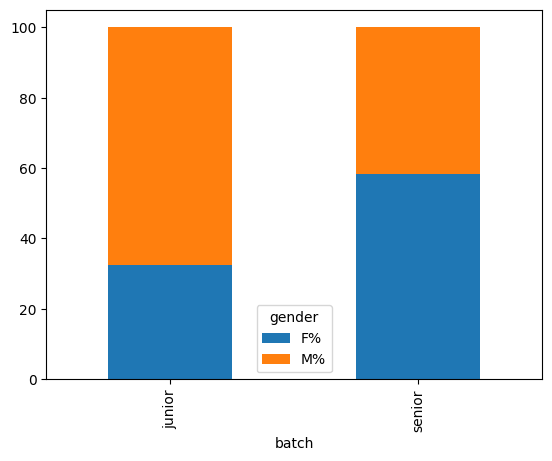

In [12]:
gender_batch_counts[['F%', 'M%']].plot(kind='bar', stacked=True)

and within the groups the gender proportion is also different.

<Axes: xlabel='avg_internet_usage'>

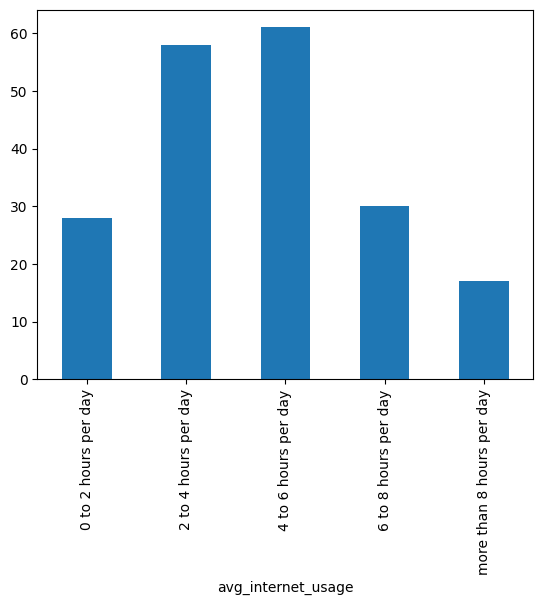

In [15]:
df['avg_internet_usage'].value_counts().sort_index().plot(kind='bar')

In [20]:
internet_usage_by_batch = df.groupby(['avg_internet_usage','batch']).size().unstack()
internet_usage_by_batch

batch,junior,senior
avg_internet_usage,,
0 to 2 hours per day,23,5
2 to 4 hours per day,51,7
4 to 6 hours per day,42,19
6 to 8 hours per day,14,16
more than 8 hours per day,9,8


<BarContainer object of 5 artists>

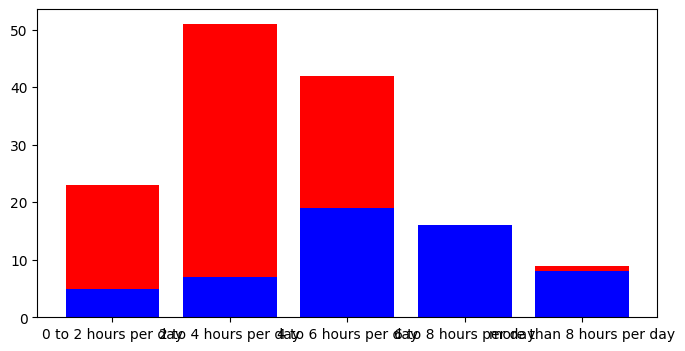

In [23]:
fig, ax = plt.subplots(figsize=(8,4))

ax.bar(internet_usage_by_batch.index, internet_usage_by_batch['junior'], label='junior', color='red')
ax.bar(internet_usage_by_batch.index, internet_usage_by_batch['senior'], label='senior', color='blue')
